<a href="https://colab.research.google.com/github/YogithL/Data-Science/blob/main/S%26P500_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
install.packages("mosaic")
library(mosaic)


sp500_data <- read.csv('https://skewthescript.org/s/sp500_data.csv')
head(sp500_data)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,Symbol,Name,Sector,Price_Earnings,Dividend_Yield,Earnings_Share,Market_Cap,EBITDA,Price_Sales,Price_Book,HighLow,Target,Momentum_3M,Momentum_6M,Momentum_12M,Price
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A,Agilent Technologies Inc,Health Care,27.45,0.8756979,2.10,21984606918,1094000000,6.4935630,4.56,0.3961568,1.0597125,1.0260664,1.1792176,1.284761,65.05
2,AAL,American Airlines Group,Industrials,9.92,0.7782101,3.91,24594852352,5761000000,0.5802257,6.03,0.4088477,1.2143734,0.9855434,0.9006834,1.140855,48.60
3,AAPL,Apple Inc.,Information Technology,16.86,1.5795412,9.20,810000000000,79386000000,3.4586093,5.66,0.3156945,0.9040481,1.0236394,1.1238872,1.342650,155.15
4,ABBV,AbbVie Inc.,Health Care,19.41,2.4995599,3.29,181000000000,10310000000,6.2915710,26.14,0.6066556,0.9905098,0.9944565,1.0011336,1.114091,108.48
5,ABT,Abbott Laboratories,Health Care,22.51,1.9089824,0.26,102000000000,5744000000,3.7404804,3.19,0.3966590,1.0173584,1.0663249,1.0787250,1.168218,56.27
6,ACN,Accenture plc,Information Technology,25.47,1.7144699,5.44,98765855553,5643228000,2.6041170,10.62,0.3174540,0.9866163,1.1241459,1.2161413,1.427597,150.51


In [16]:
dim(sp500_data)

[1] 379  16

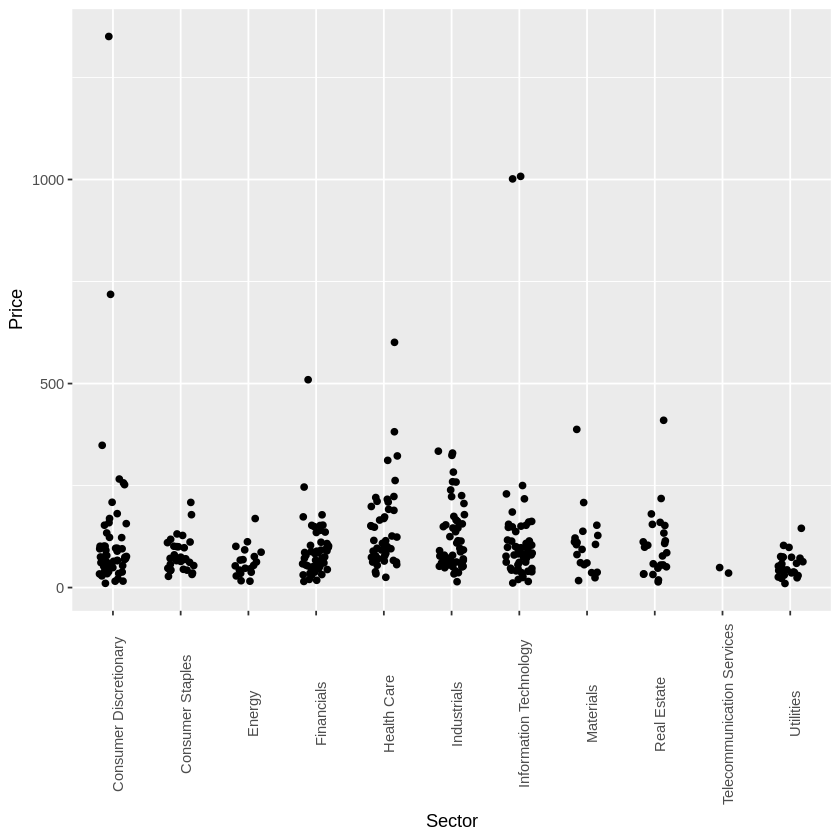

In [17]:
gf_jitter(Price ~ Sector, data= sp500_data, width= .2) + theme(axis.text.x = element_text(angle = 90))

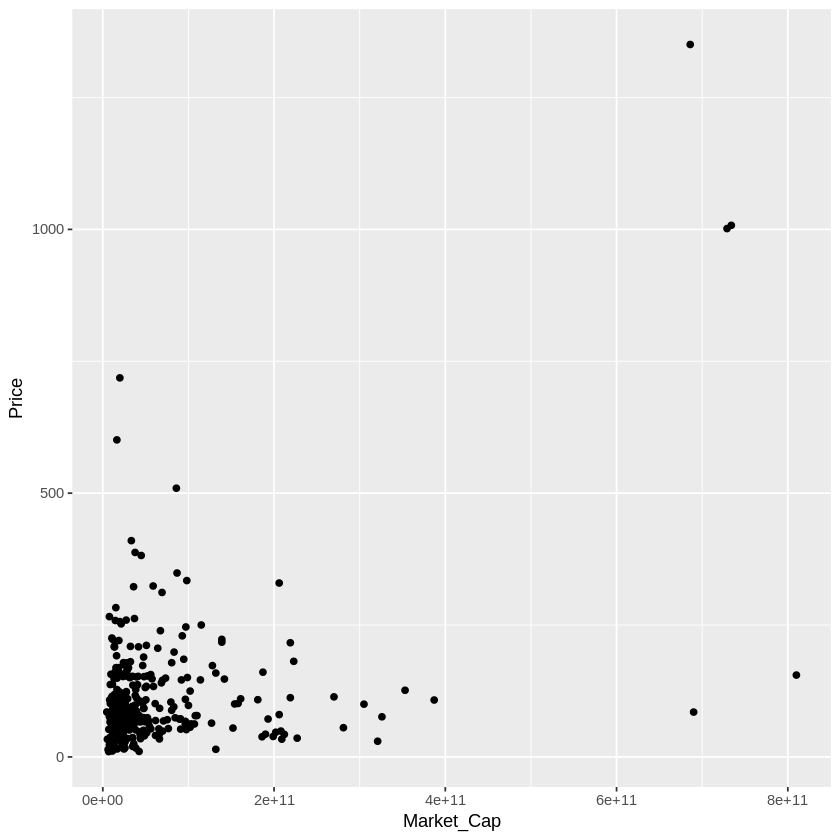

In [18]:
gf_point(Price~Market_Cap, data=sp500_data)

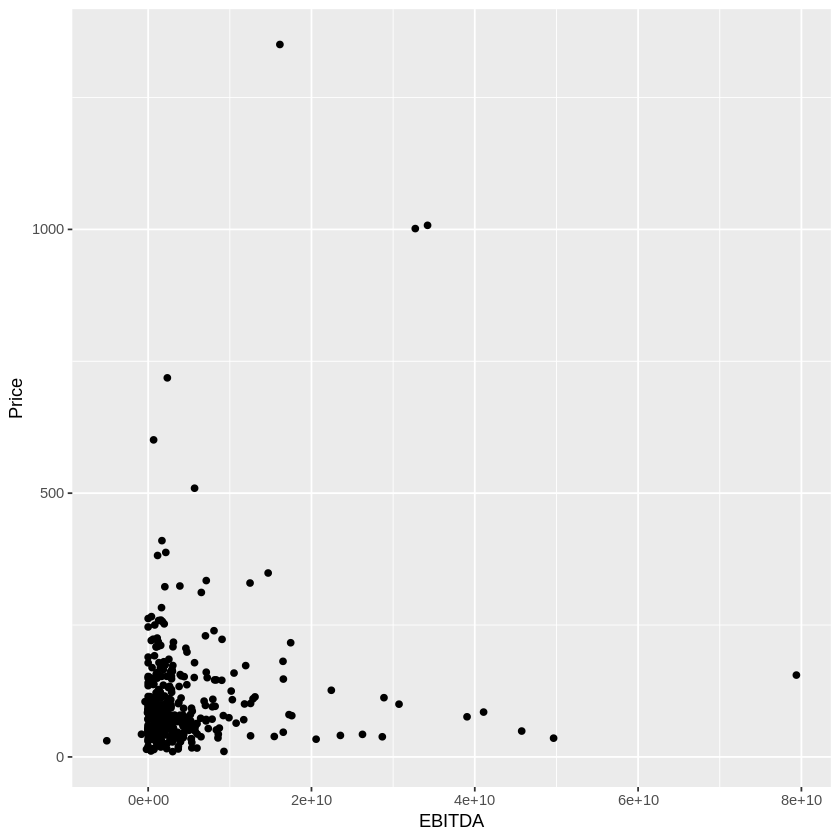

In [19]:
gf_point(Price~EBITDA, data=sp500_data)

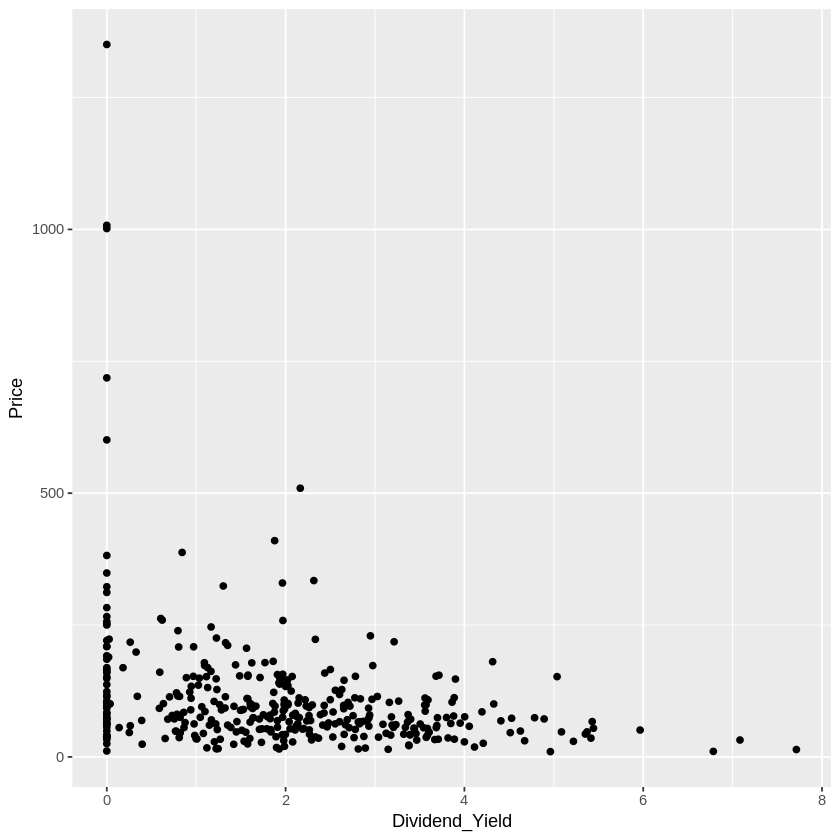

In [20]:
gf_point(Price~Dividend_Yield, data=sp500_data)

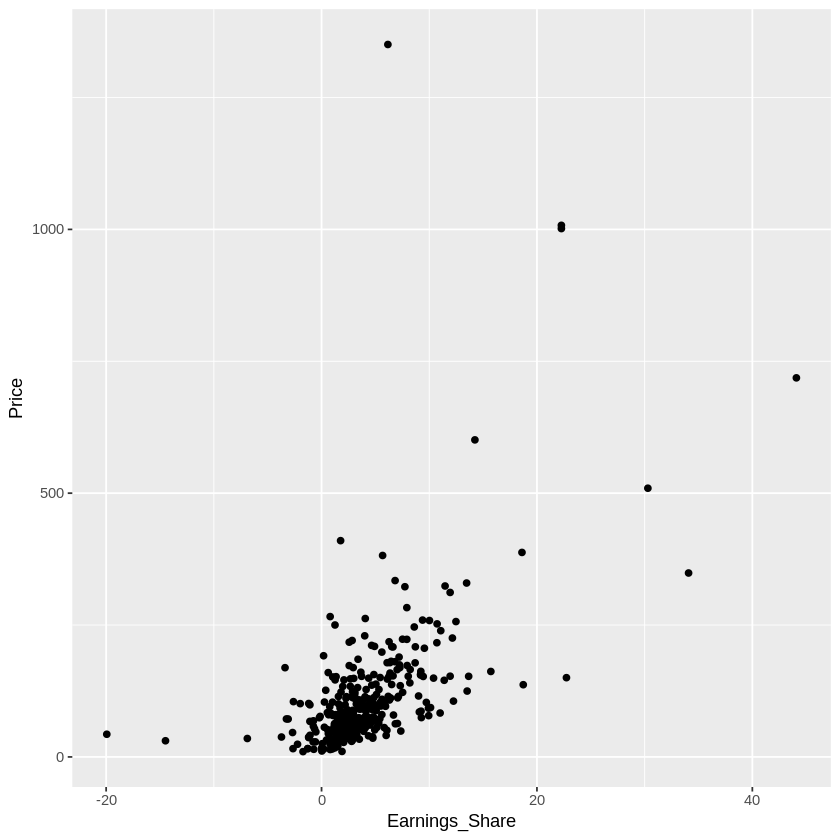

In [21]:
gf_point(Price~Earnings_Share, data=sp500_data)

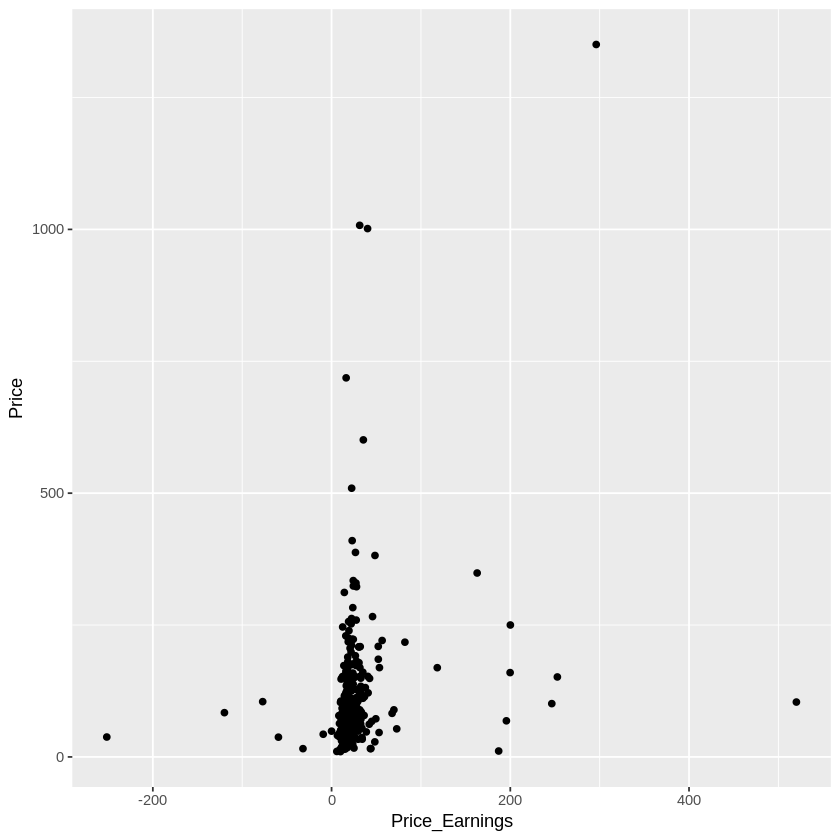

In [22]:
gf_point(Price~Price_Earnings, data=sp500_data)

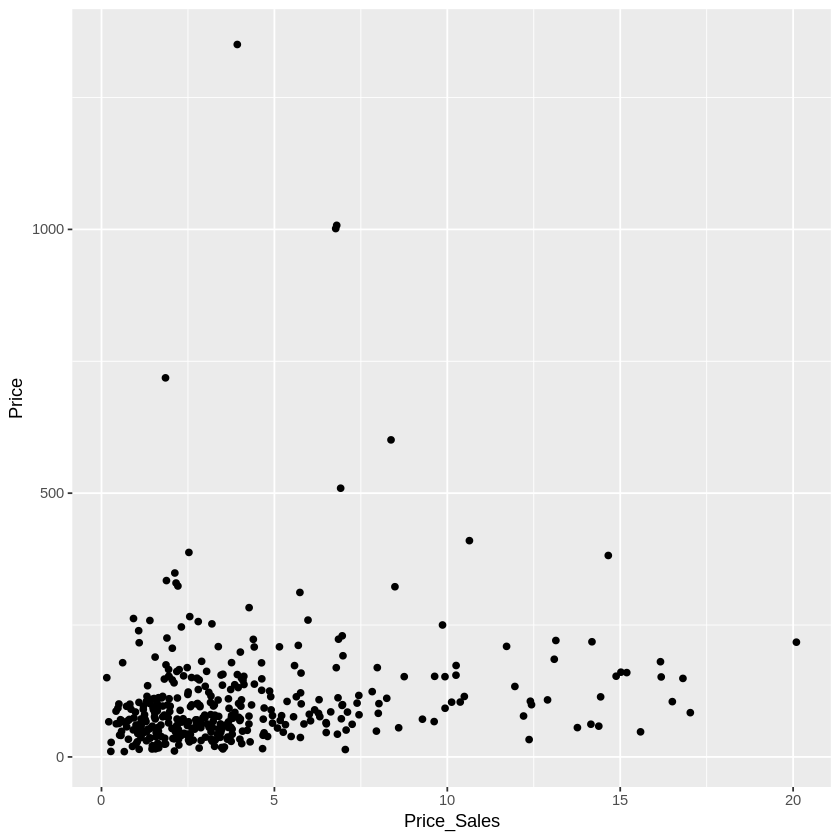

In [23]:
gf_point(Price~Price_Sales, data=sp500_data)

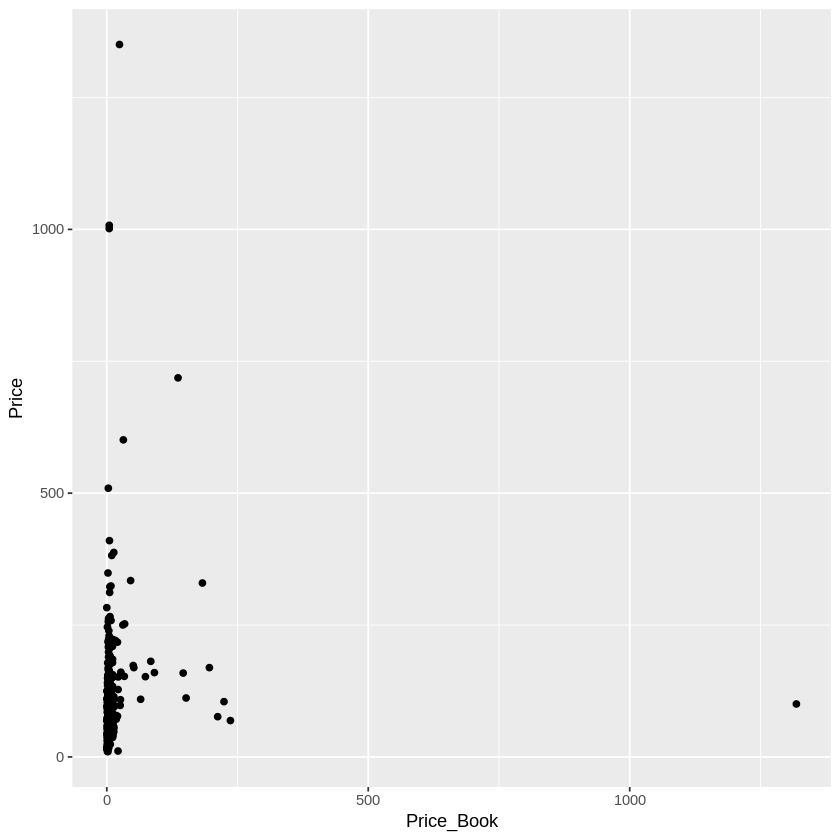

In [24]:
gf_point(Price~Price_Book, data=sp500_data)

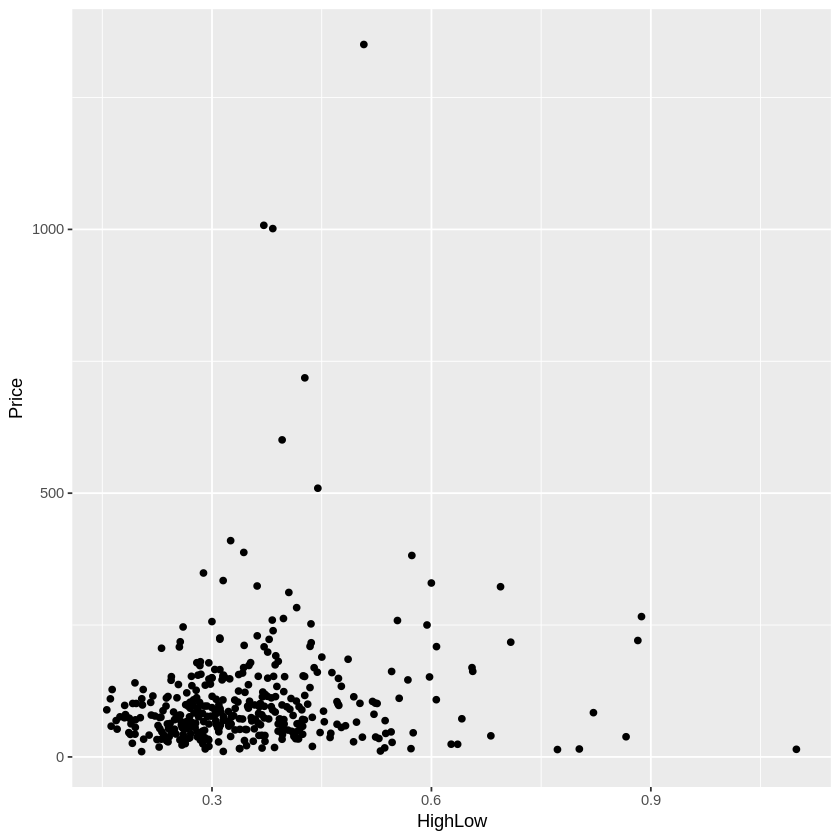

In [25]:
gf_point(Price~HighLow, data=sp500_data)

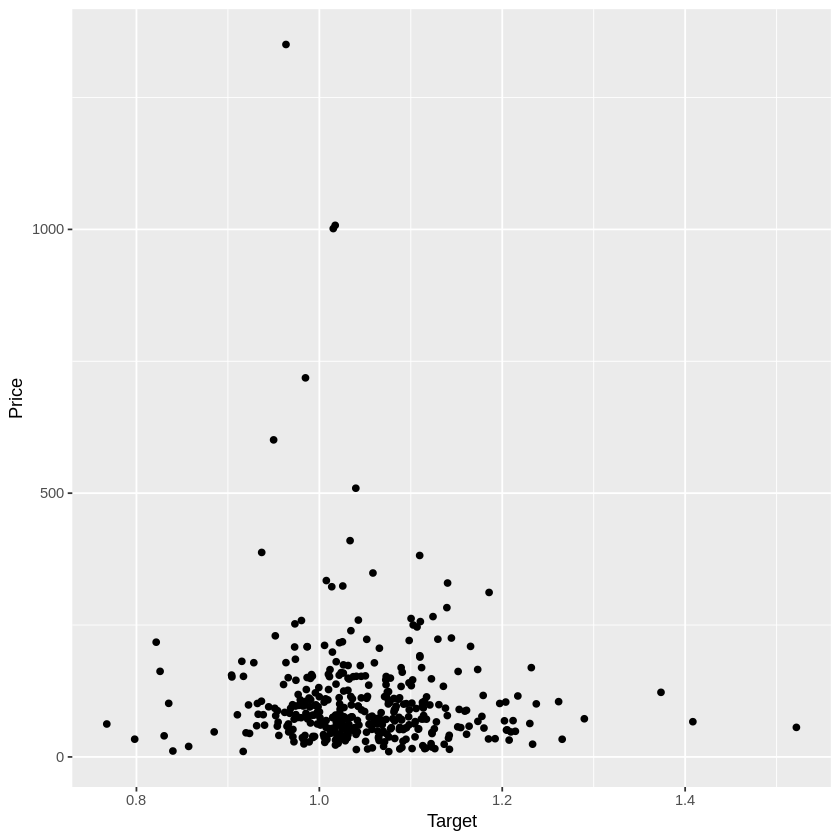

In [26]:
gf_point(Price~Target, data=sp500_data)

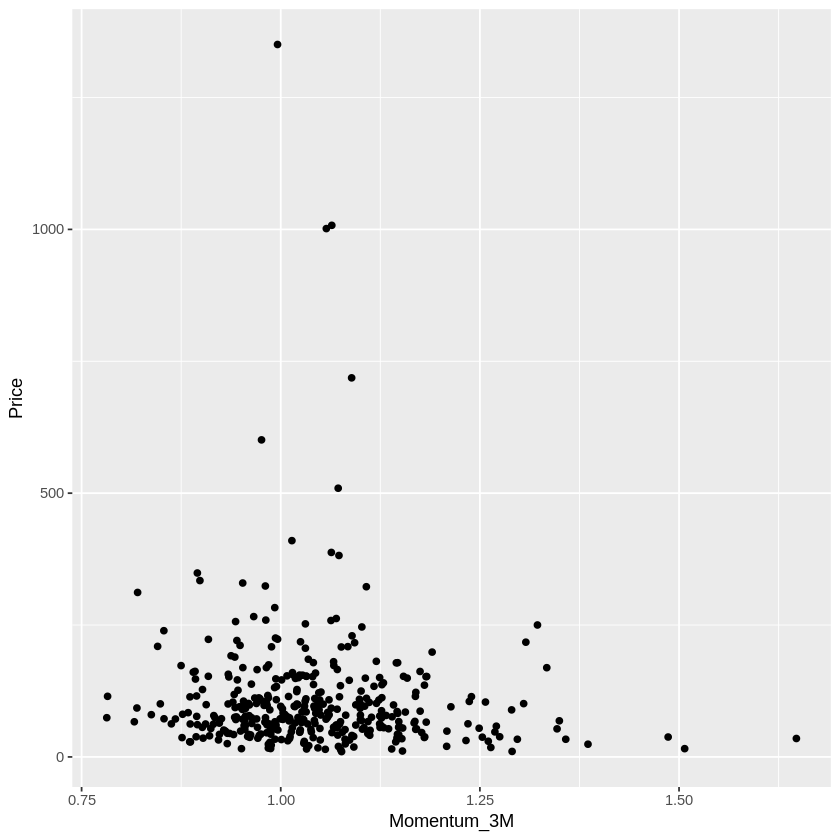

In [27]:
gf_point(Price~Momentum_3M, data=sp500_data)

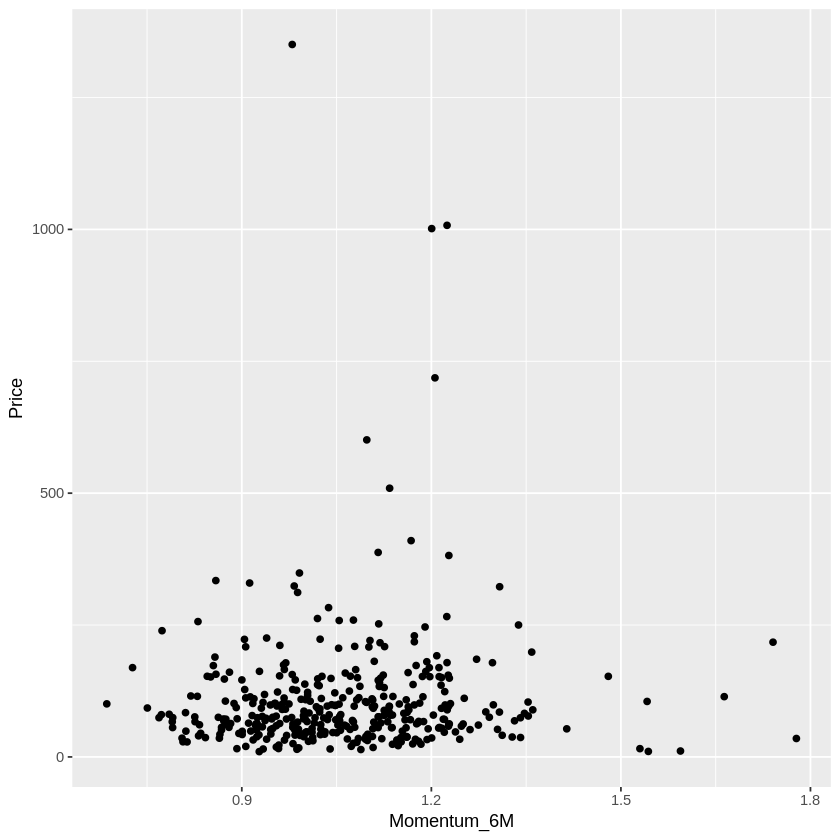

In [28]:
gf_point(Price~Momentum_6M, data=sp500_data)

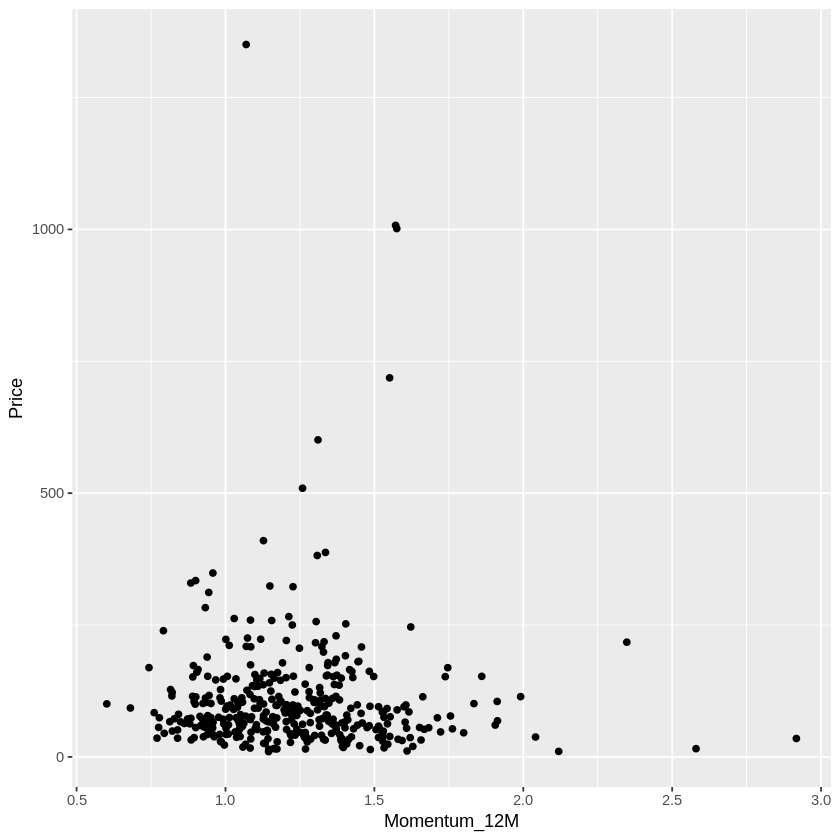

In [29]:
gf_point(Price~Momentum_12M, data=sp500_data)

In [30]:
sp500_data <- select(sp500_data, -c('Symbol', 'Name'))

sp500_data <- model.matrix( ~ 0 + . , data = sp500_data)

sp500_data <- data.frame(sp500_data)

head(sp500_data)

,SectorConsumer.Discretionary,SectorConsumer.Staples,SectorEnergy,SectorFinancials,SectorHealth.Care,SectorIndustrials,SectorInformation.Technology,SectorMaterials,SectorReal.Estate,SectorTelecommunication.Services,⋯,Market_Cap,EBITDA,Price_Sales,Price_Book,HighLow,Target,Momentum_3M,Momentum_6M,Momentum_12M,Price
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,1,0,0,0,0,0,⋯,21984606918,1094000000,6.4935630,4.56,0.3961568,1.0597125,1.0260664,1.1792176,1.284761,65.05
2,0,0,0,0,0,1,0,0,0,0,⋯,24594852352,5761000000,0.5802257,6.03,0.4088477,1.2143734,0.9855434,0.9006834,1.140855,48.60
3,0,0,0,0,0,0,1,0,0,0,⋯,810000000000,79386000000,3.4586093,5.66,0.3156945,0.9040481,1.0236394,1.1238872,1.342650,155.15
4,0,0,0,0,1,0,0,0,0,0,⋯,181000000000,10310000000,6.2915710,26.14,0.6066556,0.9905098,0.9944565,1.0011336,1.114091,108.48
5,0,0,0,0,1,0,0,0,0,0,⋯,102000000000,5744000000,3.7404804,3.19,0.3966590,1.0173584,1.0663249,1.0787250,1.168218,56.27
6,0,0,0,0,0,0,1,0,0,0,⋯,98765855553,5643228000,2.6041170,10.62,0.3174540,0.9866163,1.1241459,1.2161413,1.427597,150.51


In [31]:
set.seed(123)

N = nrow(sp500_data)

train_size = round(.8 * N)

train_rows <- sample.int(n = N, size = train_size, replace = F)

train <- sp500_data[train_rows, ]
test  <- sp500_data[-train_rows, ]

dim(train)
dim(test)

[1] 303  24

[1] 76 24

In [32]:
mean_model <- mean(sp500_data$Price)
mean_model
mean_model_RMSE <- sqrt(mean((sp500_data$Price - mean_model)^2))
mean_model_RMSE

[1] 109.9782

[1] 122.8186

In [33]:
baseline_model <- lm(Price ~ Earnings_Share + Dividend_Yield + EBITDA + Market_Cap, data = train)
predict_baseline_model <- predict(baseline_model, newdata= test)
baseline_model_RMSE <- sqrt(mean((test$Price - predict_baseline_model)^2))
baseline_model_RMSE

[1] 60.64876

In [42]:
better_model <- lm(Price ~ Earnings_Share + Dividend_Yield + EBITDA + Market_Cap + SectorConsumer.Discretionary + SectorConsumer.Staples + SectorEnergy + SectorFinancials + SectorHealth.Care + SectorIndustrials + SectorInformation.Technology + SectorMaterials + SectorReal.Estate + SectorTelecommunication.Services, data = train)
predict_better_model <- predict(better_model, newdata= test)
better_model_RMSE <- sqrt(mean((test$Price - predict_better_model)^2))
better_model_RMSE

[1] 51.94852

In [35]:
poly_model <- lm(Price ~ poly(Earnings_Share + Dividend_Yield + EBITDA + Market_Cap, 4), data = train)
predict_poly_model <- predict(poly_model, newdata= test)
poly_model_RMSE <- sqrt(mean((test$Price - predict_poly_model)^2))
poly_model_RMSE

[1] 76.12075

In [36]:
install.packages('neuralnet')
library(neuralnet)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Deriv’



Attaching package: ‘neuralnet’


The following object is masked from ‘package:dplyr’:

    compute




In [37]:
train_net <- train
train_net$Price_Earnings <- train$Price_Earnings/max(sp500_data$Price_Earnings)
train_net$Dividend_Yield <- train$Dividend_Yield/max(sp500_data$Dividend_Yield)
train_net$Earnings_Share <- train$Earnings_Share/max(sp500_data$Earnings_Share)
train_net$Market_Cap <- train$Market_Cap/max(sp500_data$Market_Cap)
train_net$EBITDA <- train$EBITDA/max(sp500_data$EBITDA)
train_net$Price_Sales <- train$Price_Sales/max(sp500_data$Price_Sales)
train_net$Price_Book <- train$Price_Book/max(sp500_data$Price_Book)
train_net$HighLow <- train$HighLow/max(sp500_data$HighLow)
train_net$Target <- train$Target/max(sp500_data$Target)
train_net$Momentum_3M <- train$Momentum_3M/max(sp500_data$Momentum_3M)
train_net$Momentum_6M <- train$Momentum_6M/max(sp500_data$Momentum_6M)
train_net$Momentum_12M <- train$Momentum_12M/max(sp500_data$Momentum_12M)

test_net <- test
test_net$Price_Earnings <- test$Price_Earnings/max(sp500_data$Price_Earnings)
test_net$Dividend_Yield <- test$Dividend_Yield/max(sp500_data$Dividend_Yield)
test_net$Earnings_Share <- test$Earnings_Share/max(sp500_data$Earnings_Share)
test_net$Market_Cap <- test$Market_Cap/max(sp500_data$Market_Cap)
test_net$EBITDA <- test$EBITDA/max(sp500_data$EBITDA)
test_net$Price_Sales <- test$Price_Sales/max(sp500_data$Price_Sales)
test_net$Price_Book <- test$Price_Book/max(sp500_data$Price_Book)
test_net$HighLow <- test$HighLow/max(sp500_data$HighLow)
test_net$Target <- test$Target/max(sp500_data$Target)
test_net$Momentum_3M <- test$Momentum_3M/max(sp500_data$Momentum_3M)
test_net$Momentum_6M <- test$Momentum_6M/max(sp500_data$Momentum_6M)
test_net$Momentum_12M <- test$Momentum_12M/max(sp500_data$Momentum_12M)

head(train_net)
head(test_net)

,SectorConsumer.Discretionary,SectorConsumer.Staples,SectorEnergy,SectorFinancials,SectorHealth.Care,SectorIndustrials,SectorInformation.Technology,SectorMaterials,SectorReal.Estate,SectorTelecommunication.Services,⋯,Market_Cap,EBITDA,Price_Sales,Price_Book,HighLow,Target,Momentum_3M,Momentum_6M,Momentum_12M,Price
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
179,0,0,0,0,0,0,1,0,0,0,⋯,0.175308642,0.20856322,0.09043199,0.005839084,0.2691808,0.6785812,0.5420604,0.4907384,0.3404028,147.59
14,0,0,0,0,0,0,0,0,0,0,⋯,0.008544261,0.03780264,0.03282095,0.001668310,0.1854271,0.7070732,0.6534086,0.5217917,0.3923908,10.06
195,0,0,0,1,0,0,0,0,0,0,⋯,0.016815861,0.02023279,0.13194684,0.001228483,0.2585602,0.7935877,0.6595011,0.5442568,0.4575542,31.92
306,1,0,0,0,0,0,0,0,0,0,⋯,0.010806704,0.00637518,0.06941651,0.001850307,0.4784151,0.7322436,0.6675536,0.5354435,0.4504536,101.32
118,0,0,0,0,0,0,0,0,0,0,⋯,0.024009470,0.05396418,0.10754769,0.001205733,0.3857923,0.6339503,0.6973905,0.5996496,0.3622904,58.07
299,0,0,0,0,0,0,1,0,0,0,⋯,0.012194920,0.01016395,0.16866191,0.001501479,0.2671238,0.7740030,0.5430182,0.5245039,0.3134513,76.85


,SectorConsumer.Discretionary,SectorConsumer.Staples,SectorEnergy,SectorFinancials,SectorHealth.Care,SectorIndustrials,SectorInformation.Technology,SectorMaterials,SectorReal.Estate,SectorTelecommunication.Services,⋯,Market_Cap,EBITDA,Price_Sales,Price_Book,HighLow,Target,Momentum_3M,Momentum_6M,Momentum_12M,Price
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,1,0,0,0,0,0,⋯,0.027141490,0.01378077,0.32315457,0.0034579510,0.3604827,0.6964273,0.6228729,0.6633275,0.4404175,65.05
3,0,0,0,0,0,0,1,0,0,0,⋯,1.000000000,1.00000000,0.17211898,0.0042921059,0.2872661,0.5941269,0.6213995,0.6322033,0.4602620,155.15
6,0,0,0,0,0,0,1,0,0,0,⋯,0.121933155,0.07108593,0.12959485,0.0080533859,0.2888671,0.6483895,0.6824119,0.6840976,0.4893821,150.51
8,0,0,0,0,0,0,1,0,0,0,⋯,0.039273554,0.02095312,0.39831755,0.0023735497,0.2611648,0.6359258,0.6337404,0.6505054,0.4405043,82.68
15,0,0,0,1,0,0,0,0,0,0,⋯,0.041262899,0.00000000,0.07678470,0.0011602336,0.2506324,0.6718790,0.6088246,0.5661260,0.4115915,83.25
17,0,0,0,1,0,0,0,0,0,0,⋯,0.005745671,0.00000000,0.04887888,0.0008493213,0.2251901,0.7108095,0.6232234,0.5755626,0.3895397,85.16


In [81]:
set.seed(213)

simple_model <- neuralnet(
    Price ~ Earnings_Share + Dividend_Yield + EBITDA + Market_Cap + SectorConsumer.Discretionary + SectorConsumer.Staples + SectorEnergy + SectorFinancials + SectorHealth.Care + SectorIndustrials + SectorInformation.Technology + SectorMaterials + SectorReal.Estate + SectorTelecommunication.Services,
    data = train_net,
    lifesign = 'full',
    threshold = 5,
    hidden = c(4))

simple_neural_errors = test_net$Price - predict(simple_model, newdata = test_net)
sqrt(mean(simple_neural_errors^2))

hidden: 4    thresh: 5    rep: 1/1    steps: 
   1000	min thresh: 2170.01733745818
                                             
   2000	min thresh: 904.726753714924
                                             
   3000	min thresh: 623.056869157435
                                             
   4000	min thresh: 241.447483184833
                                             
   5000	min thresh: 123.113791218915
                                             
   6000	min thresh: 41.0510398254655
                                             
   7000	min thresh: 41.0510398254655
                                             
   8000	min thresh: 41.0510398254655
                                             
   9000	min thresh: 41.0510398254655
                                             
  10000	min thresh: 41.0510398254655
                                             
  11000	min thresh: 41.0510398254655
                                             
  12000	min thresh: 41.0510398254655
    

[1] 54.96352